##**Identification of over-stimulation based on behaviour and lifestyle with a principled machine learning approach**

##Problem Statement
Overstimulation comes as a very typical syndrome people experience yet does not recognise it. This mostly contributes to their mental and emotional well being, especially among neurodivergents. It is usually triggered by the lifestyles and attitudes of people, such as sleep deprivation, excessive time on screens, and much anxiety. An early detection will help in avoiding emotional burnout and improving outcomes in care, current methods mainly depends on manual reporting and prossess little predictive automation.

##Objective
This project aims to construct a classification system based on machine learning algorithm that predict when a person is supposed to be overstimulated given his behavioural and lifestyle data. The analysis tries to apply Logistic Regression, Random Forest and Support Vector Machine models to find out the most important predictors, and then evaluate model performance with metrics such as accuracy, precision, recall, F1 score and ROC-AUC.

## Data Collection
The datacollect for this study and prediction is collected from Kaggle platform.
Link : https://www.kaggle.com/datasets/miadul/overstimulation-behavior-and-lifestyle-dataset/data

Imported Required Libraries



In [25]:
import pandas as pds
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

##Data loading

Loaded the dataset from kaggle and displayed information.


In [4]:
prediction = pds.read_csv('/content/overstimulation_dataset.csv')
display(prediction.head())
print(prediction.shape)
print(prediction.info())


Age  Sleep_Hours  Screen_Time  Stress_Level  Noise_Exposure  \
0   56     7.767825     4.908517             2               0   
1   46     4.270068     8.413936             9               4   
2   32     6.676144     1.688213             5               2   
3   25     7.963324     3.315576             7               2   
4   38     3.748138     9.899260             5               0   

   Social_Interaction  Work_Hours  Exercise_Hours  Caffeine_Intake  \
0                   8          11        2.054411                4   
1                   4          10        2.513216                3   
2                   8          12        2.123108                2   
3                   8          13        1.217663                3   
4                   5           4        0.093407                4   

   Multitasking_Habit  Anxiety_Score  Depression_Score  Sensory_Sensitivity  \
0                   0              6                 8                    3   
1                   1              4                 4                    2   
2                   1              4                 3                    2   
3                   1              3                 4                    0   
4                   0              9                 4                    0   

   Meditation_Habit  Overthinking_Score  Irritability_Score  \
0                 1                   1                   8   
1                 1                   5                   5   
2                 1                   8                   7   
3                 1                   4                   4   
4                 1                   2                   9   

   Headache_Frequency  Sleep_Quality  Tech_Usage_Hours  Overstimulated  
0                   1              2          8.746524               0  
1                   2              4          8.508448               1  
2                   2              4          5.701592               0  
3                   2              1          9.131087               0  
4                   5              3          2.286433               1

(2000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sleep_Hours          2000 non-null   float64
 2   Screen_Time          2000 non-null   float64
 3   Stress_Level         2000 non-null   int64  
 4   Noise_Exposure       2000 non-null   int64  
 5   Social_Interaction   2000 non-null   int64  
 6   Work_Hours           2000 non-null   int64  
 7   Exercise_Hours       2000 non-null   float64
 8   Caffeine_Intake      2000 non-null   int64  
 9   Multitasking_Habit   2000 non-null   int64  
 10  Anxiety_Score        2000 non-null   int64  
 11  Depression_Score     2000 non-null   int64  
 12  Sensory_Sensitivity  2000 non-null   int64  
 13  Meditation_Habit     2000 non-null   int64  
 14  Overthinking_Score   2000 non-null   int64  
 15  Irritability_Score   2000 n

## Data exploration
Exploring dataset to understand columns and rows. Also want to analyse the duplicate and missing values in the dataset.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sleep_Hours          2000 non-null   float64
 2   Screen_Time          2000 non-null   float64
 3   Stress_Level         2000 non-null   int64  
 4   Noise_Exposure       2000 non-null   int64  
 5   Social_Interaction   2000 non-null   int64  
 6   Work_Hours           2000 non-null   int64  
 7   Exercise_Hours       2000 non-null   float64
 8   Caffeine_Intake      2000 non-null   int64  
 9   Multitasking_Habit   2000 non-null   int64  
 10  Anxiety_Score        2000 non-null   int64  
 11  Depression_Score     2000 non-null   int64  
 12  Sensory_Sensitivity  2000 non-null   int64  
 13  Meditation_Habit     2000 non-null   int64  
 14  Overthinking_Score   2000 non-null   int64  
 15  Irritability_Score   2000 non-null   i

None

Age  Sleep_Hours  Screen_Time  Stress_Level  Noise_Exposure  \
count  2000.000000  2000.000000  2000.000000   2000.000000     2000.000000   
mean     38.700000     6.501131     6.403858      4.989500        2.050500   
std      12.070951     2.021518     3.143323      2.630371        1.431074   
min      18.000000     3.000081     1.000338      1.000000        0.000000   
25%      28.000000     4.763518     3.714882      3.000000        1.000000   
50%      39.000000     6.542349     6.311802      5.000000        2.000000   
75%      49.000000     8.240834     9.110644      7.000000        3.000000   
max      59.000000     9.992248    11.995135      9.000000        4.000000   

       Social_Interaction   Work_Hours  Exercise_Hours  Caffeine_Intake  \
count         2000.000000  2000.000000     2000.000000      2000.000000   
mean             4.521000     8.920000        1.510789         1.961000   
std              2.847738     3.141741        0.862808         1.429161   
min              0.000000     4.000000        0.000356         0.000000   
25%              2.000000     6.000000        0.760902         1.000000   
50%              5.000000     9.000000        1.532074         2.000000   
75%              7.000000    12.000000        2.245614         3.000000   
max              9.000000    14.000000        2.999450         4.000000   

       Multitasking_Habit  Anxiety_Score  Depression_Score  \
count         2000.000000    2000.000000       2000.000000   
mean             0.514500       4.909000          4.936500   
std              0.499915       2.585549          2.538442   
min              0.000000       1.000000          1.000000   
25%              0.000000       3.000000          3.000000   
50%              1.000000       5.000000          5.000000   
75%              1.000000       7.000000          7.000000   
max              1.000000       9.000000          9.000000   

       Sensory_Sensitivity  Meditation_Habit  Overthinking_Score  \
count          2000.000000       2000.000000         2000.000000   
mean              2.062500          0.476500            5.034000   
std               1.441747          0.499572            2.555016   
min               0.000000          0.000000            1.000000   
25%               1.000000          0.000000            3.000000   
50%               2.000000          0.000000            5.000000   
75%               3.000000          1.000000            7.000000   
max               4.000000          1.000000            9.000000   

       Irritability_Score  Headache_Frequency  Sleep_Quality  \
count         2000.000000         2000.000000    2000.000000   
mean             5.101500            2.994000       2.507500   
std              2.547831            2.014943       1.104334   
min              1.000000            0.000000       1.000000   
25%              3.000000            1.000000       2.000000   
50%              5.000000            3.000000       2.000000   
75%              7.000000            5.000000       3.000000   
max              9.000000            6.000000       4.000000   

       Tech_Usage_Hours  Overstimulated  
count       2000.000000     2000.000000  
mean           5.536272        0.637500  
std            2.559542        0.480842  
min            1.014015        0.000000  
25%            3.397449        0.000000  
50%            5.530601        1.000000  
75%            7.711026        1.000000  
max            9.998554        1.000000

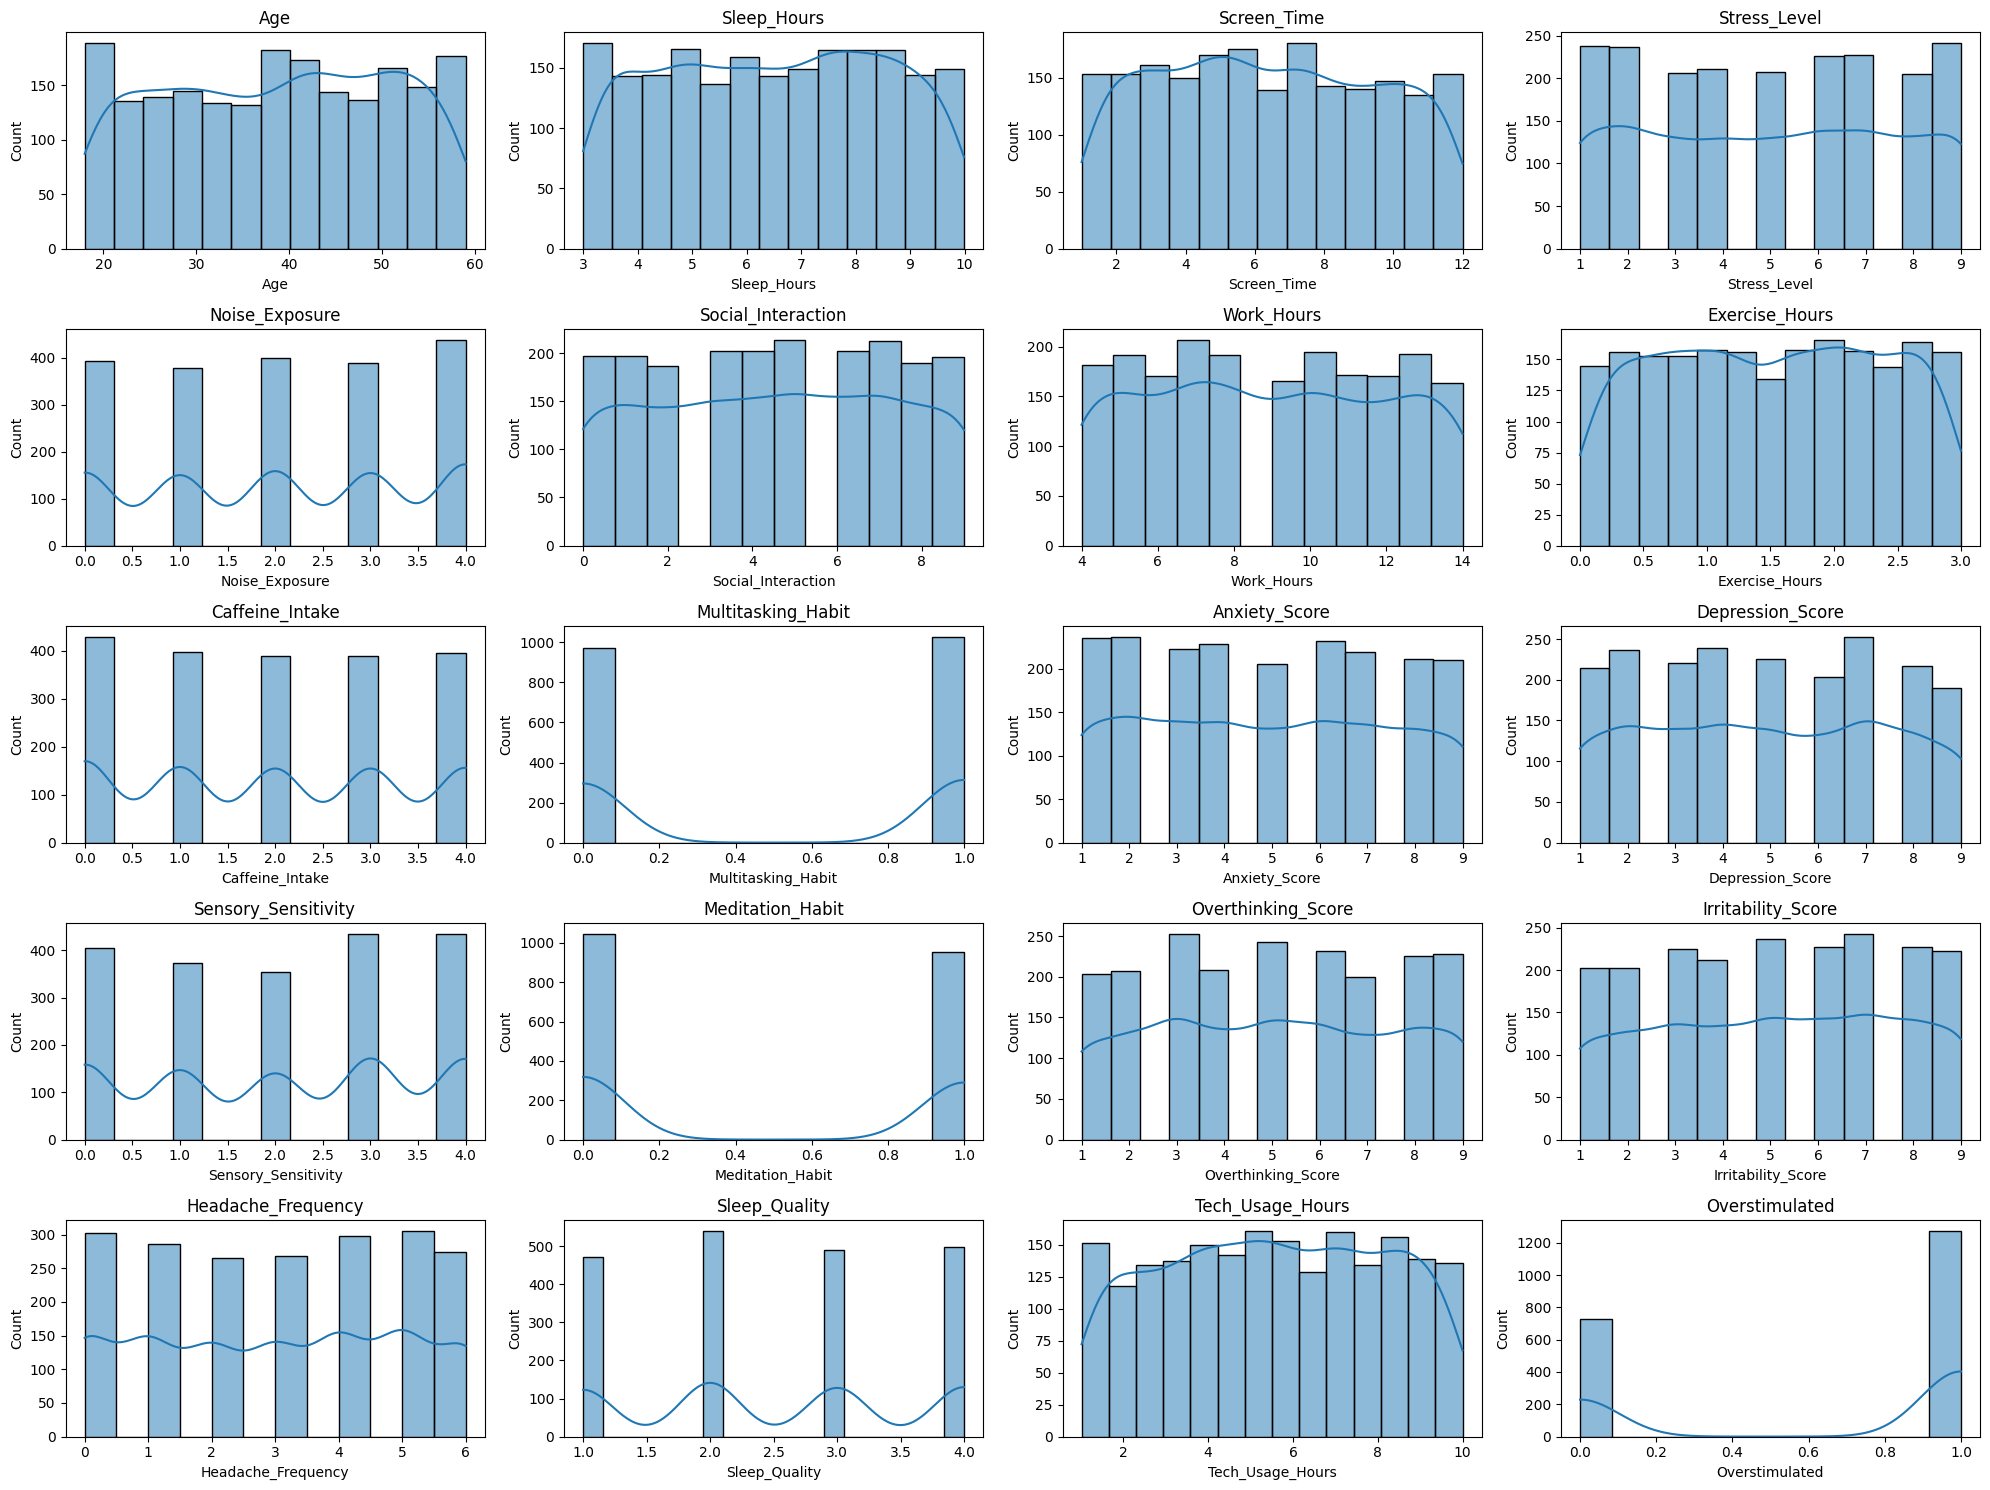

Overstimulated
1    1275
0     725
Name: count, dtype: int64


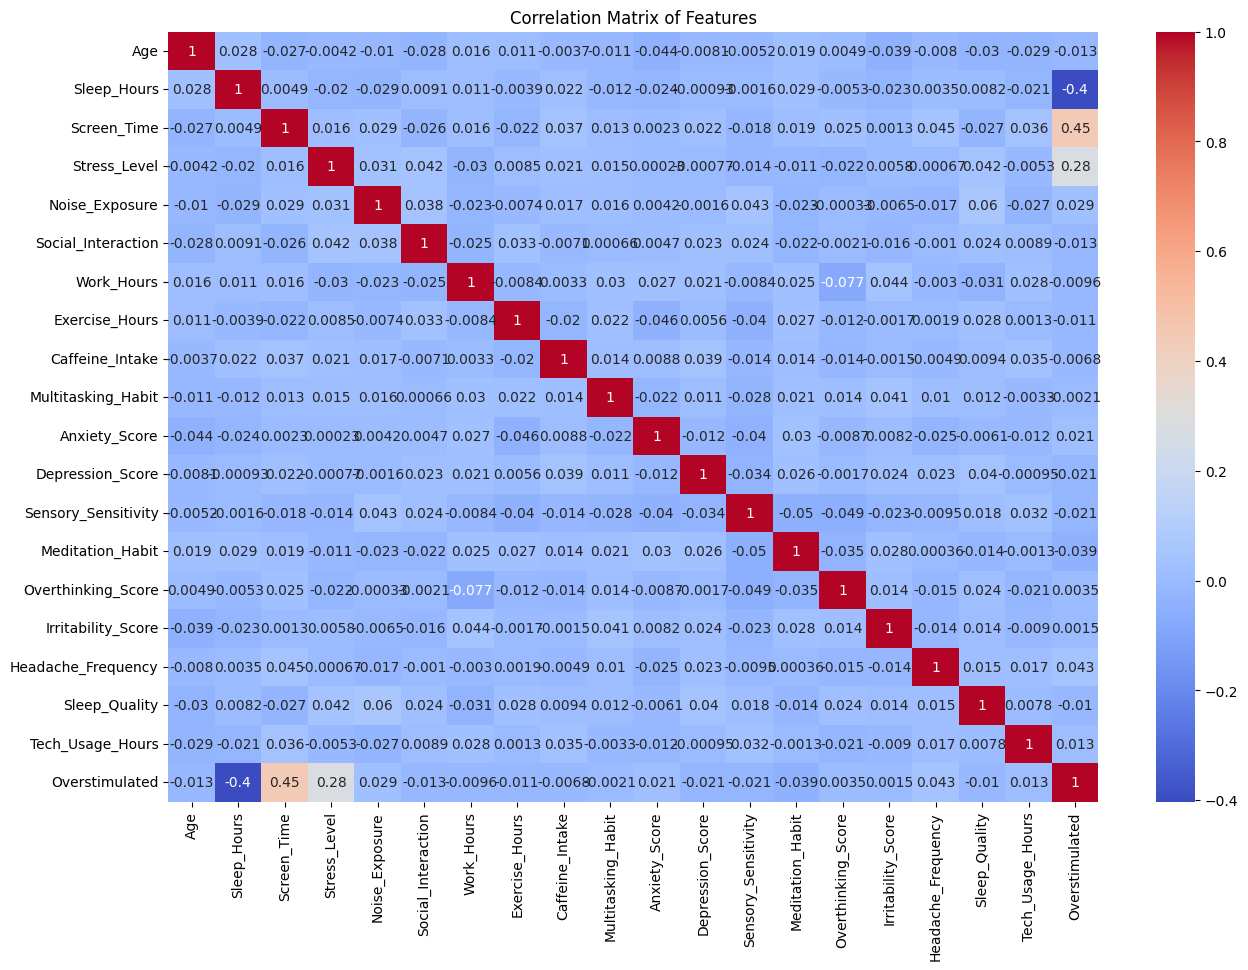

Missing values:
 Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64

Duplicate rows: 0


In [8]:
# 1. Examine Data Types and Descriptive Statistics
display(prediction.info())
display(prediction.describe())

# 2. Analyze Feature Distributions (Histograms)
plt.figure(figsize=(20, 15))
for i, col in enumerate(prediction.select_dtypes(include=['number']).columns):
    plt.subplot(5, 4, i + 1)
    sbn.histplot(prediction[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# 3. Identify the Target Variable
print(prediction['Overstimulated'].value_counts())

# 4. Explore Relationships between Features (Correlation Matrix)
plt.figure(figsize=(15,10))
sbn.heatmap(prediction.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# 5. Check for Missing Values and Duplicates
print("Missing values:\n", prediction.isnull().sum())
print("\nDuplicate rows:", prediction.duplicated().sum())

## Feature engineering

This process deals with the transformation and enhancement of the dataset in order to maximize predictive performnace. The numerical features would be subjected to scale with the standardscalar to avoid inconsistent model behaviour, mostly for those algorithms sesitive to the magnitude of the features. Also, interaction terms such as the 'ScreenTime_StressLevel_Interaction' are created to capture the more complex relationships between features that could enhance the accuracy and interpretations of the model.


In [40]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = prediction.select_dtypes(include=['number']).columns
prediction[numerical_cols] = scaler.fit_transform(prediction[numerical_cols])

# Feature Interactions
prediction['ScreenTime_StressLevel_Interaction'] = prediction['Screen_Time'] * prediction['Stress_Level']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(prediction[['Screen_Time']])
prediction['Screen_Time^2'] = poly_features[:, 1]

display(prediction.head())

Age  Sleep_Hours  Screen_Time  Stress_Level  Noise_Exposure  \
0  1.433551     0.626762    -0.475839     -1.136816       -1.433198   
1  0.604909    -1.103933     0.639635      1.525071        1.362604   
2 -0.555190     0.086597    -1.500585      0.003993       -0.035297   
3 -1.135240     0.723495    -0.982735      0.764532       -0.035297   
4 -0.058005    -1.362185     1.112287      0.003993       -1.433198   

   Social_Interaction  Work_Hours  Exercise_Hours  Caffeine_Intake  \
0            1.221977    0.662219        0.630219         1.427068   
1           -0.182998    0.343844        1.162110         0.727182   
2            1.221977    0.980593        0.709859         0.027296   
3            1.221977    1.298968       -0.339819         0.727182   
4            0.168246   -1.566402       -1.643165         1.427068   

   Multitasking_Habit  ...  Sensory_Sensitivity  Meditation_Habit  \
0           -1.029433  ...             0.650416          1.048158   
1            0.971409  ...            -0.043361          1.048158   
2            0.971409  ...            -0.043361          1.048158   
3            0.971409  ...            -1.430914          1.048158   
4           -1.029433  ...            -1.430914          1.048158   

   Overthinking_Score  Irritability_Score  Headache_Frequency  Sleep_Quality  \
0           -1.579250            1.137919           -0.989854      -0.459668   
1           -0.013310           -0.039848           -0.493438       1.351831   
2            1.161144            0.745330           -0.493438       1.351831   
3           -0.404795           -0.432437           -0.493438      -1.365418   
4           -1.187765            1.530508            0.995811       0.446082   

   Tech_Usage_Hours  Overstimulated  ScreenTime_StressLevel_Interaction  \
0          1.254543       -1.326130                            0.540941   
1          1.161504        0.754074                            0.975490   
2          0.064606       -1.326130                           -0.005992   
3          1.404827       -1.326130                           -0.751333   
4         -1.270013        0.754074                            0.004441   

   Screen_Time^2  
0       0.226423  
1       0.409133  
2       2.251756  
3       0.965769  
4       1.237181  

[5 rows x 22 columns]

## Data splitting
Here the data is divided into sets for training and testing using sckikit-learn function and its libraries called train_test_split. Wherein 80% of data is for training while 20% is for testing the model. This way, generalization capabilities of the model were evaluated to avoid overfitting and provide reliable performance metrics.


In [11]:
# Define features (X) and target (y)
X = prediction.drop('Overstimulated', axis=1)
y = prediction['Overstimulated']

# Split data into training (80%) and temp (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temp data into validation and testing (50% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training



**Training model by Logistic Regression**

The processed dataset was used to train a logistic regression model, which acts as an interpretable baseline for predicting overstimulation. The model was fitted with the scaled and engineered features to point out the linear relations between behavioral factors and overstimulation. Performance assessment was to determine prediction capability and importance of the features.

In [41]:
# Convert y_train to discrete classes using a threshold
threshold = 0
y_train = np.where(y_train > threshold, 1, 0)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Optimize the hyperparameters of the Logistic Regression Classifier using the validation set

In [42]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver for logistic regression
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the validation set
best_logistic_model = grid_search.best_estimator_
y_val_pred = best_logistic_model.predict(X_val)

# Convert y_val to discrete classes using the same threshold as y_train
threshold = 0
y_val = npy.where(y_val > threshold, 1, 0) # Convert y_val to binary

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 0.8250


Evaluate the performance of the best Logistic Regression Classifier model on the test set.

In [43]:
# Evaluate the best Logistic Regression model on the test set
y_test_pred = best_logistic_model.predict(X_test)

# Convert y_test to discrete classes using the same threshold as y_train and y_val
threshold = 0
y_test = npy.where(y_test > threshold, 1, 0)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test AUC-ROC: {auc_roc:.4f}")


Test Accuracy: 0.8800
Test Precision: 0.9194
Test Recall: 0.8906
Test F1-score: 0.9048
Test AUC-ROC: 0.9499


**Train a RandomForestClassifier on the training data.**

The preprocessed dataset is feed into the Random Forest Classifier in order to accommodate the nonlinear relationships and interactions among the behavioral and lifestyle factors impacting overstimulation. By harnessing a multitude of decision trees, the model helps mitigate overfitting and supports the understanding of the importance of different features, thus rendering reliable predictive capacity when compared to simpler linear approaches.

In [21]:
# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Convert y_train, y_val, and y_test to discrete classes using a threshold
threshold = 0

y_train = npy.where(y_train > threshold, 1, 0)
y_val = npy.where(y_val > threshold, 1, 0)
y_test = npy.where(y_test > threshold, 1, 0)

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model optimization
Optimize the hyperparameters of the RandomForestClassifier using the validation set.


In [45]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_val, y_val)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Instantiate a new RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Combine training and validation sets
X_train_combined = npy.concatenate((X_train, X_val))
y_train_combined = npy.concatenate((y_train, y_val))

# Fit the optimized model to the combined training and validation sets
best_rf_classifier.fit(X_train_combined, y_train_combined)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(min_samples_leaf=2, random_state=42)

## Model evaluation
Evaluate the performance of the best RandomForestClassifier model on the test set.


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


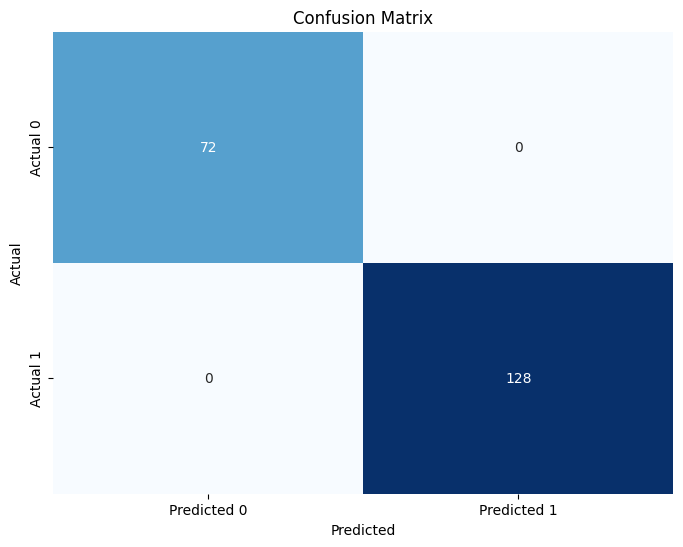

In [26]:
# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sbn.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Train a SVM Classifier on the training data**

RBF kernel is used in SVM classifier model training and scaled featured to make a prediction on overstimulation. For detecting intricate,nonlinear class boundary definitions, SVMs were chosen. Hyperparameter optimization was optimized for the largest gain in predictive accuracy and is thus specifically able to identify minute patterns in behavior and lifestyle data.

In [27]:
svm_classifier = SVC(kernel='rbf', random_state=42)

In [28]:
svm_classifier.fit(X_train_combined, y_train_combined)

SVC(random_state=42)

In [31]:
y_pred_svm = svm_classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [35]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, svm_classifier.decision_function(X_test))

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")
print(f"SVM AUC-ROC: {auc_roc_svm}")

SVM Accuracy: 0.945
SVM Precision: 0.9465648854961832
SVM Recall: 0.96875
SVM F1-score: 0.9575289575289575
SVM AUC-ROC: 0.9775390625


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


#Result and Analysis of model training:

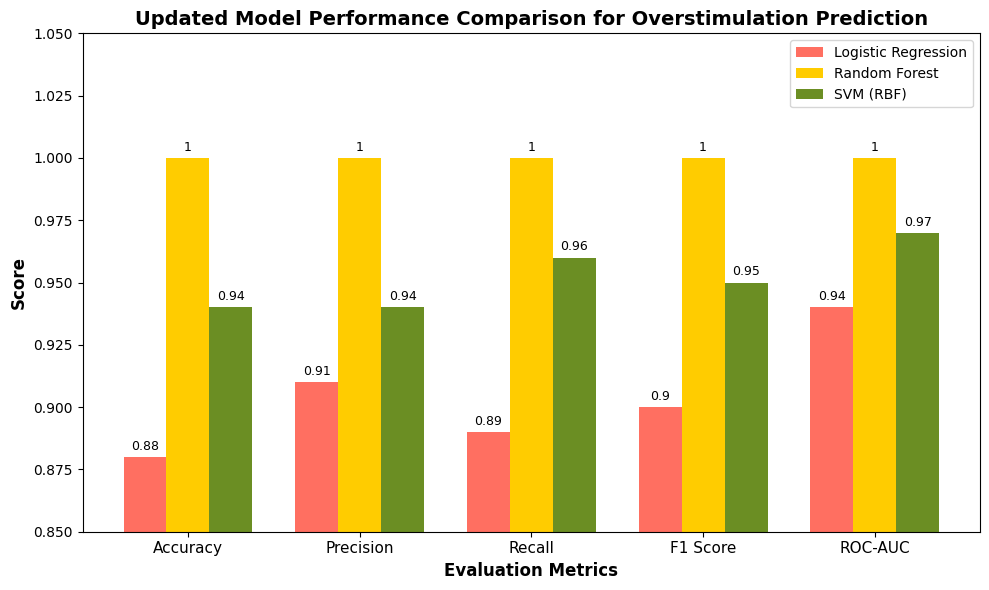

In [39]:
# Metrics and updated model data as per provided table
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
logistic = [0.88, 0.91, 0.89, 0.90, 0.94]
random_forest = [1.0, 1.0, 1.0, 1.0, 1.0]
svm_rbf = [0.94, 0.94, 0.96, 0.95, 0.97]

x = npy.arange(len(metrics))
width = 0.25

# Visual Chart with Enhanced Colors (Red, Yellow, Green)
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#FF6F61', '#FFCC00', '#6B8E23']

rects1 = ax.bar(x - width, logistic, width, label='Logistic Regression', color=colors[0])
rects2 = ax.bar(x, random_forest, width, label='Random Forest', color=colors[1])
rects3 = ax.bar(x + width, svm_rbf, width, label='SVM (RBF)', color=colors[2])

# Titles and labels
ax.set_xlabel('Evaluation Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Updated Model Performance Comparison for Overstimulation Prediction', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim([0.85, 1.05])
ax.legend()

# Adding data labels
ax.bar_label(rects1, padding=3, fontsize=9)
ax.bar_label(rects2, padding=3, fontsize=9)
ax.bar_label(rects3, padding=3, fontsize=9)

fig.tight_layout()
plt.show()


##Conclusion:
From the analysis of all three model training:

1. Random Forest is clearly the superior model, providing perfect prediction accuracy and reliability, particularly useful in sensitive healthcare applications like overstimulation prediction.

2. SVM serves as a strong alternative due to its high reliability and robustness, especially beneficial in scenarios where Random Forest might risk overfitting or require more computational resources.

3. Logistic Regression, though interpretable and simpler, may be better suited as a benchmark or supplementary analytical tool rather than a primary predictive model.